# Building Scalable Semantic Search with Pinecone

## Introduction

In this project, we will delve into the fascinating realm of vector databases and their pivotal role in powering AI-driven applications. Our focus will be on Pinecone, one of the leading vector databases in the industry, renowned for its efficiency and scalability. This project is designed to be a comprehensive exploration, making it a valuable addition to your generative AI portfolio.

### Objectives

- **Understand Semantic Search**: Learn the principles of semantic search and how it differs from traditional keyword-based search.
- **Explore Vector Databases**: Gain hands-on experience with Pinecone, understanding its architecture and capabilities.
- **Practical Application**: Implement semantic search on real-world datasets, such as the Stanford Question Answering Dataset (SQuAD), to answer questions about various topics including Beyoncé and Chopin.

### Thought Process and Methodology

1. **Introduction to Semantic Search**:
   - **Conceptual Understanding**: We'll start by understanding what semantic search is and why it often outperforms traditional keyword search. This will include a discussion on natural language processing (NLP) and how it enables machines to understand context and meaning.
   - **Use Cases**: Explore various scenarios where semantic search can be applied, such as customer support, content recommendation, and information retrieval.

2. **Setting Up Pinecone**:
   - **Environment Setup**: Guide through setting up the Pinecone environment, including account creation, API key generation, and installation of necessary libraries.
   - **Data Ingestion**: Learn how to ingest data into Pinecone, converting textual information into vector representations using pre-trained models like BERT or GPT.

3. **Implementing Semantic Search**:
   - **Indexing**: Understand the process of indexing vectors in Pinecone and how it facilitates efficient search operations.
   - **Querying**: Implement querying mechanisms to retrieve relevant information based on semantic similarity rather than exact keyword matches.

4. **Case Study: Stanford Question Answering Dataset (SQuAD)**:
   - **Dataset Overview**: Introduction to the SQuAD dataset, its structure, and the type of questions it contains.
   - **Semantic Search Implementation**: Apply semantic search techniques to answer questions from the SQuAD dataset, focusing on topics like Beyoncé, Chopin, and other cultural figures.
   - **Evaluation**: Assess the performance of our semantic search implementation, comparing it with traditional search methods.

### Skills and Frameworks

- **Natural Language Processing (NLP)**: Understanding and applying NLP techniques to convert text into meaningful vector representations.
- **Vector Databases**: Hands-on experience with Pinecone, learning how to store, index, and query vector data efficiently.
- **Python Programming**: Utilizing Python for data manipulation, model integration, and API interactions.
- **Machine Learning Models**: Leveraging pre-trained models like BERT or GPT for vectorization of text data.

### Goals

By the end of this project, you will have a solid understanding of semantic search and its applications. You will be proficient in using Pinecone for vector data management and will have practical experience in implementing and evaluating semantic search solutions. This project will not only enhance your technical skills but also serve as a significant addition to your generative AI portfolio, showcasing your ability to work with cutting-edge technologies and solve complex problems.

Let's embark on this journey to unlock the potential of semantic search with Pinecone!

### Uses of vector search

Vector search is an incredibly important technology that we all use _every single day_.

Vector search is how Amazon knows what you want to buy before even you do, it's how Netflix recommends TV shows and films, and it's how Google serves the most relevant results from the web at search time. 

When searching using natural language (as in the Google example), semantic search can often perform much better than keyword matching  (which is how traditional search works).

In this example, a traditional search that relies on keyword or term overlap will not perform well—despite the fact that this document is highly relevant to the query. Here, we need to search based on _meaning_, not just keywords. It is in these natural language queries—queries structured in the way we, as human beings, think—that we can retrieve the most relevant documents.

The use-cases for this type of search are extensive, but some of the most common applications of semantic search include:

* **Document Search**: This is a favorite use-case for organizations, especially those with poor internal document discovery systems. Enabling staff to find the information they need more quickly can lead to significant optimizations in productivity and efficiency.

* **Chatbot Knowledge Training**: With the rise of AI chatbots, another popular use-case is the ability to augment chatbots or **L**arge **L**anguage **M**odels (LLMs) with external data. Semantic search is used to retrieve this data—a process commonly referred to as **R**etrieval **A**ugmented **G**eneration (RAG). This allows chatbots to provide more accurate and contextually relevant responses.

* **Language Classification**: By placing many classified sequences into a vector database, we can more quickly classify new sentences by comparing their semantic similarity to existing entries. This is particularly useful in applications like sentiment analysis, topic categorization, and spam detection.

* **Agent/Chatbot Safety**: An increasingly popular use-case for semantic search is in ensuring chatbot safety. This functions similarly to language classification but focuses on identifying malicious or unwanted inputs/outputs between users and chatbots. This helps in maintaining a safe and respectful interaction environment.

These are just a few examples of the many use-cases for semantic search. As you progress through this chapter and gain the skills and knowledge to build your own semantic search applications, you will undoubtedly encounter and recognize many more applications in the real world.

## Setup

Before we start building our chatbot, we need to install some Python libraries. Here's a brief overview of what each library does:

- **openai**: This is the official OpenAI Python client. We'll use it to interact with the OpenAI API and generate embeddings for Pinecone.
- **pinecone-client**: This is the official Pinecone Python client. We'll use it to interact with the Pinecone vector DB where we will store our semantic search database.
- **datasets**: This library provides a vast array of datasets for machine learning. We'll use it to load our knowledge base for the chatbot.
- **seaborn**: This is a popular plotting library. We'll use it for drawingheatmaps of similarity between sentences.

### Instructions

Run the following code to install the packages needed for this code-along.

In [3]:
!pip install openai==1.27
!pip install pinecone-client==4.0.0
!pip install datasets==2.19.1
!pip install seaborn==0.13.2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 29.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Semantic Similarity

We will start by understand what is actually happening under the hood of Pinecone. As mentioned, we're doing something called "semantic similarity". Semantic similarity is simply comparing the semantic meaning of two chunks of text.

For example, let's define a list of sentences and compare them based on their "meaning" as we (as humans) understand them.

### Run this code to define a list containing text data. 

In [4]:
sentences = [
    "the hive of bees protect their queen",                         # 0
    "a beehive is an enclosed structure in which honey bees live",  # 1
    "a condominium is an enclosed structure in which people live",  # 2
    "the flying stinging insects guard the matriarch"               # 3
]

### How similar are these sentences to humans?

It's clear to people that sentences 0 and 3 mean the same thing. Depending on the context we could view 1 and 2 as being similar in talking about where X lives, and 0, 1, and 3 are likewise similar in that they're talking about bees.

### How similar are these sentences using keyword matching?

If we were to compare these using the more traditional approach of keyword matching we would very quickly run into problems. The sentences 1 and 2 might score well, but the other sentences have little-to-no overlap in keywords—so they would not be identified as similar.

### Let's see how semantic search performs!

It is for these scenarios that we rely on semantic search. It works by teaching a language model to transform text into meaningful _vector embeddings_. We call them _meaningful_ because the language model actually learns to transform semantically similar sentences into a similar vector space (ie, in vector space, the embeddings are nearby).

We can try creating these embeddings using OpenAI's Ada 002 model like so:

### Embed the sentences using the Ada AI.

- Import the OpenAI package.
- Set the model to Ada version 002, `"text-embedding-ada-002"`. Assign to `model`.
- Define an OpenAI client model. Assign to `client`.
- Send `sentences` to OpenAI API to create embeddings. Assign to `res`.

In [5]:
import openai

model = "text-embedding-ada-002"
client = openai.OpenAI()

res = client.embeddings.create(input=sentences, model=model)

### 
- Pull out the embeddings from the API response into list. Assign to `embeds`.
- _Look at the statistics about the embeddings. What do you think those numbers mean?_

In [6]:
embeds = [r.embedding for r in res.data]

print("There are this many embeddings: ", len(embeds))
print("Each embedding is a vector containing this many numbers: ", len(embeds[0]))

There are this many embeddings:  4
Each embedding is a vector containing this many numbers:  1536


We have `4` embeddings (one for each of our four sentences). Ada 002 also outputs an embedding dimensionality of `1536`. 

That is, embedding has converted each sentence (regardless of its length) to a vector of 1536 floating point numbers.

In [7]:
# Is each embedding the same size?
len(embeds[0]), len(embeds[1]), len(embeds[2]), len(embeds[3])

(1536, 1536, 1536, 1536)

In [8]:
if len(embeds[0]) == len(embeds[1]) == len(embeds[2]) == len(embeds[3]):
    print("True, all the embeddings have the same len and shape. We are good to keep going...")

True, all the embeddings have the same len and shape. We are good to keep going...


### Measuring similarity

Now that we have numeric vectors instead of text, we can calculate how similar the sentences are to each other. There are several common measures for calculating how similar two numeric vectors are, including _dot product_ and _cosine similarity_.

Here, we'll use the _dot product_. If you imagine the numeric vectors as arrows pointing in different directions in space, then the dot product measures how closely those arrows point in the same direction.

For each pair of sentences, you get a score between `-1` and `1`. A score of one mean that the sentences have identical meaning. Lower scores indicate less similarity, and in practice, for two well-formed sentences in English, the dot product similarity seldom drops much below `0.7`.

### Calculate the dot product of the embedded sentences.

- From `numpy`, import `dot` and `array`.
- Convert `embeds` to an array. Assign to `embeds_arr`.
- Get the dot product of `embeds_arr` and its transpose. Assign to `dot_product`.
- Print the result.

In [9]:
from numpy import dot, array

embeds_arr = array(embeds)

embeds_arr.shape

(4, 1536)

In [10]:
dot_prod = dot(embeds_arr, embeds_arr.T)

dot_prod.shape

(4, 4)

In [11]:
dot_prod

array([[0.99999999, 0.88132716, 0.75794367, 0.89120323],
       [0.88132716, 0.99999996, 0.84596041, 0.80991248],
       [0.75794367, 0.84596041, 0.99999991, 0.73952583],
       [0.89120323, 0.80991248, 0.73952583, 0.99999999]])

### Visualizing similarity

Array of numbers are tedious to read, but can visualize these similarity values with a heatmap. For each value in the dot product, we get a colored cell.

Every sentence will be perfectly similar to itself, so the cells on the diagonal will have a score of one (and in the default Seaborn color scheme have a pale red color).

Sentences that are less alike will have a lower score and a darker colored cell.

### Draw a heatmap of the dot product array to visualize how similar each sentence is.

- Import `seaborn` with the alias `sns`.
- Draw a heatmap of `dot_product` with annotations.

<Axes: >

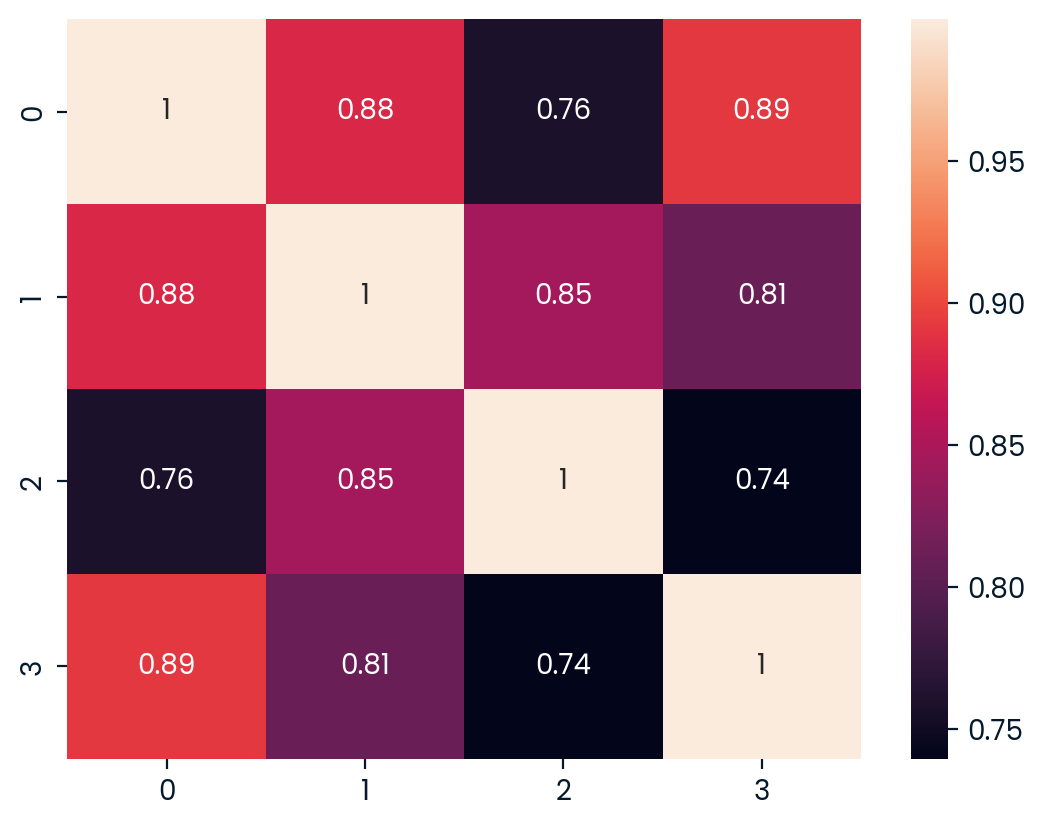

In [12]:
import seaborn as sns

sns.heatmap(dot_prod, annot=True)

### How similar are the sentences?

From this we can see that the most similar pairs are:

| Pair | Similarity | A | B |
| ---- | ---------- | --- | --- |
| 0-3  | 0.89       | "the hive of bees protect their queen" | "the flying stinging insects guard the matriarch" |
| 0-1  | 0.88       | "the hive of bees protect their queen" | "a beehive is an enclosed structure in which honey bees live" |
| 1-2  | 0.85       | "a beehive is an enclosed structure in which honey bees live" | "a condominium is an enclosed structure in which people live" |
| 1-3  | 0.81       | "a beehive is an enclosed structure in which honey bees live" | "the flying stinging insects guard the matriarch" |
| 0-2  | 0.76       | "the hive of bees protect their queen" | "a condominium is an enclosed structure in which people live" |
| 2-3  | 0.74       | "a condominium is an enclosed structure in which people live" | "the flying stinging insects guard the matriarch" |

This ordering of semantic similarity seems to align well with how most people would order them in terms of similarity in meaning—and it is for that, that these embedding models are optimized.

## Importing the Dataset

We typically would not do semantic search for comparing just four sentences. Instead, it is done with thousands, millions, or even billions of records—Google is a great example of a partly semantic search done at large scales.

We'll perform semantic serach on the **S**tanford **Qu**estion **A**nswering **D**ataset v2 (SQuAD v2), the second version of a popular question-answering dataset. It contains _contexts_ which are simply paragraphs that contain information that can help a language model answer the question provided in the _question_ column.

In this task, you will:

* Download the [`squad_v2`](https://huggingface.co/datasets/squad_v2) dataset using Hugging Face Datasets.
* Take a look at the dataset structure, paying attention to the **context** and **question** columns.
* Deduplicate the **context** column to return a list of paragraphs that we will later search through.

### Download and print the `squad_v2` dataset.

- From `datasets`, import `load_dataset`
- Load the `squad_v2` dataset, just getting the training split. Assign to `data`.
- Print the dataset object.

In [13]:
from datasets import load_dataset

data = load_dataset("squad_v2", split="train")

data

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 130319
})

### Print and read some records from the squad dataset.

- Print several records of `data`, one at at time.
- *Read the contents. What is the structure of each record? What are the contents about?*

In [14]:
data[0]

{'id': '56be85543aeaaa14008c9063',
 'title': 'Beyoncé',
 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".',
 'question': 'When did Beyonce start becoming popular?',
 'answers': {'text': ['in the late 1990s'], 'answer_start': [269]}}

In [15]:
data[1500]

{'id': '56cc5fd66d243a140015ef54',
 'title': 'Sino-Tibetan_relations_during_the_Ming_dynasty',
 'context': "As evident in his imperial edicts, the Hongwu Emperor was well aware of the Buddhist link between Tibet and China and wanted to foster it. Rolpe Dorje, 4th Karmapa Lama (1340–1383) rejected the Hongwu Emperor's invitation, although he did send some disciples as envoys to the court in Nanjing. The Hongwu Emperor also entrusted his guru Zongluo, one of many Buddhist monks at court, to head a religious mission into Tibet in 1378–1382 in order to obtain Buddhist texts.",
 'question': 'Who did Rolpe Dorje send as envoys to court in Nanjing?',
 'answers': {'text': ['disciples'], 'answer_start': [249]}}

In [16]:
data[600]

{'id': '56beca973aeaaa14008c9479',
 'title': 'Beyoncé',
 'context': 'Her debut single, "Crazy in Love" was named VH1\'s "Greatest Song of the 2000s", NME\'s "Best Track of the 00s" and "Pop Song of the Century", considered by Rolling Stone to be one of the 500 greatest songs of all time, earned two Grammy Awards and is one of the best-selling singles of all time at around 8 million copies. The music video for "Single Ladies (Put a Ring on It)", which achieved fame for its intricate choreography and its deployment of jazz hands, was credited by the Toronto Star as having started the "first major dance craze of both the new millennium and the Internet", triggering a number of parodies of the dance choreography and a legion of amateur imitators on YouTube. In 2013, Drake released a single titled "Girls Love Beyoncé", which featured an interpolation from Destiny Child\'s "Say My Name" and discussed his relationship with women. In January 2012, research scientist Bryan Lessard named Scaptia

In [17]:
data[-1]

{'id': '5a7e070b70df9f001a87543d',
 'title': 'Matter',
 'context': 'The term "matter" is used throughout physics in a bewildering variety of contexts: for example, one refers to "condensed matter physics", "elementary matter", "partonic" matter, "dark" matter, "anti"-matter, "strange" matter, and "nuclear" matter. In discussions of matter and antimatter, normal matter has been referred to by Alfvén as koinomatter (Gk. common matter). It is fair to say that in physics, there is no broad consensus as to a general definition of matter, and the term "matter" usually is used in conjunction with a specifying modifier.',
 'question': 'What field of study has a variety of unusual contexts?',
 'answers': {'text': [], 'answer_start': []}}

As there are many questions for each context, we see plenty of duplication in the _context_ column. Our next task is to deduplicate those records to give us a deduped `contexts` list.

### Remove duplicates of context values from the dataset.

- Deduplicate the `context` element of `data` by converting to a set and back to a list. Assign to `contexts`.
- Print the length of `contexts`.

In [18]:

contexts = list(set(data["context"]))

print("Total Number of elements:", len(contexts))

Total Number of elements: 19029


## Creating a Vector Index



Storing the embeddings in a NumPy array is not very permanent, or useful for sharing with other people. The embeddings need to be stored in a vector database, in this case Pinecone.

This task involves some setup steps to get the embeddings into Pinecone.


To create our first vector index we first need to initialize our connection to Pinecone.

### Initialize Pinecone, getting setup details from DataLab environment variables.

- Import the `os` package.
- Import the `pinecone` package.
- Set the pinecone api key from the environment variable. Assign to `api_key`.
- Initialize Pinecone using the API key. Assign to `pc`.

In [19]:

import os

import pinecone

api_key = os.environ["PINECONE_API_KEY"]

pc = pinecone.Pinecone(api_key)

Now we can create our index. There are a few parameters we must include. Those are:

- `index_name`: this can be anything you want, it is simply the name of the index—so use something informative!
- `dimension`: this is the expected dimensionality of the vectors in the index. We saw earlier that Ada 002 encodes into 1536-dimensional vectors, so we use that same `1536` number here.
- `metric`: this is the similarity metric we will use to compare vectors. For Ada 002 we can use `dot_product` (as we did above) or `cosine`. Other embedding may require us to use `euclidean` but this is less common. 
- `spec`: whether to use Pinecone Serverless (newer, faster and cheaper) or Pod (legacy) architecture, and the architecture details.

### Create a vector index and connect to it.

- Import `time`.
- Give the index a meaningful name, such as `"squad-search"`. Assign to `index_name`.
- Check if the index already exists. (It shouldn't on the first run.)
    - If the index does not exist then create it.
    - Wait for the index to initialize. If the index status isn't "ready" then sleep for a couple of seconds.

In [20]:
print("Lets take a look of our indexes we have so far here:")
pc.list_indexes()

Lets take a look of our indexes we have so far here:


{'indexes': [{'dimension': 1536,
              'host': 'squad-search-yy0cjqi.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'squad-search',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}},
             {'dimension': 1536,
              'host': 'vector-index-yy0cjqi.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'vector-index',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}},
             {'dimension': 1536,
              'host': 'datacamp-index-yy0cjqi.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'datacamp-index',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}},
             {'dimension': 1536,


In [21]:
#try to delete any index
#pc.delete_index("insurance-claims")

In [22]:
import time

index_name = "squad-search"
existing_index_names = [idx.name for idx in pc.list_indexes().indexes]


if index_name not in existing_index_names:
    pc.create_index(
        index_name,
        dimension=1536,
        metric="cosine",
        spec=pinecone.ServerlessSpec(
            cloud="aws",
            region="us-east-1"
        )
    )
    
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(2)

### Connect to the index. Assign to `index`.

In [23]:
index = pc.Index(index_name)

### Get statistics describing the index.

In [24]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 19029}},
 'total_vector_count': 19029}

Our index has now been created and we can see that the vector count is currently `0`, as we haven't added anything to it yet.

## Indexing our Data

Now that we have our embedding model (Ada 002), dataset, and vector index, we can begin embedding our data and added it all to the index.

We will do this in batches of `100` to avoid overloading the OpenAI or Pinecone APIs (or causing out of memory errors on our own system).

### Split the dataset into batches and add it to the vector index.

- From `tqdm`, import `tqdm` (a progress bar).
- Set the batch size to 100. Assign to `batch_size`.
- Define an OpenAI client model. Assign to `client`.
- Loop from 0 to the length of contexts by batch size, adding a progress bar.
    - Find the end of the batch. Assign to `i_end`.
    - Get the contexts for the batch to encode. Assign to `context_batch`.
    - Convert the numbers from `i` to `i_end` to strings to use as IDs for the batch. Assign to `ids_batch`.
    - Create the embeddings for the batch contexts. Assign to `res`.
    - Pull out the embeddings for each record in the response data. Assign to `embeds`.
    - Add contexts to metadata for easy retrieval later. Assign to `metadata`.
    - Combine IDs, embeddings, and metadata as list of tuples. Assign to `to_upsert`.
    - Upsert to Pinecone.

In [25]:
from tqdm import tqdm
batch_size = 100
client = openai.OpenAI()

for i in tqdm(range(0, len(contexts), batch_size)):
    i_end = min(i+batch_size, len(contexts))
    context_batch = contexts[i:i_end]
    ids_batch = [str(x) for x in range(i, i_end)]
    res = client.embeddings.create(input=context_batch, model=model)
    embeds = [d.embedding for d in res.data]
    metadata = [{"context": record} for record in context_batch]
    to_upsert = zip(ids_batch, embeds, metadata)
    index.upsert(vectors=to_upsert)

100%|██████████| 191/191 [04:40<00:00,  1.47s/it]


Now we can check our index size and we should see it has been populated with records (as seen via the vector count):

### Check on updates to the vector index now that it contains the squad dataset.

- View the index stats again.
- *What has changed since you last looked?*

In [26]:
# Get statistics to se the changes in our index
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 19029}},
 'total_vector_count': 19029}

## Semantic Search

We've now indexed our data, meaning we're ready for semantic search!

This just means that we start with a query, that is, a question to ask. Then by using similarity, we find the three questions in the squad dataset with the nearest meaning to the one we asked.

### What's the search workflow?

1. The query is text, so first it needs to be embedded. 
2. The embedded query can be searched using Pinecone's `index.query()`. To return the metadata in our response we'll also need to set `include_metadata=True`.

Let's create the query and embed it with Ada 002.

### Think of a question, then embed it.

- Specify a question, `"What three composers did Chopin take inspiration from?"`. Assign to `query`.
- Create the embedding for the query. Assign to `res`.
- Pull out the query vector from the response. Assign to `xq`.

In [27]:
query = "What three composers did Chopin take inspiration from?"

res = client.embeddings.create(input=[query], model=model)

In [28]:
xq = res.data[0].embedding

In [29]:
len(xq)

1536

Now we query Pinecone.

### Query Pinecone for matches to the embedded question.

- Query the index for the top 3 matches to `xq`, including metadata in the results. Assign to `res`.
- Print the results.

In [30]:
res = index.query(vector=xq, top_k = 3, include_metadata = True)

res

{'matches': [{'id': '9445',
              'metadata': {'context': 'Chopin was educated in the tradition of '
                                      'Beethoven, Haydn, Mozart and Clementi; '
                                      "he used Clementi's piano method with "
                                      'his own students. He was also '
                                      "influenced by Hummel's development of "
                                      'virtuoso, yet Mozartian, piano '
                                      'technique. He cited Bach and Mozart as '
                                      'the two most important composers in '
                                      "shaping his musical outlook. Chopin's "
                                      'early works are in the style of the '
                                      '"brilliant" keyboard pieces of his era '
                                      'as exemplified by the works of Ignaz '
                                      'M

That's a big response, let's clean it up and also wrap the search logic into a single `search` function.

### Run this code to define a convenience function for semantic search with prettier output.

In [31]:
def search(query):
    client = openai.OpenAI()
    res = client.embeddings.create(input=[query], model=model)
    xq = res.data[0].embedding
    res = index.query(vector=xq, top_k=3, include_metadata=True)
    xc = []
    for match in res.matches:
        context = match.metadata["context"]
        score = match.score
        xc.append(f"[{round(score, 2)}]: {context}")
    return xc

### Print each result of searching for the query.

In [32]:
for result in search(query):
    print(result)

[0.88]: Chopin was educated in the tradition of Beethoven, Haydn, Mozart and Clementi; he used Clementi's piano method with his own students. He was also influenced by Hummel's development of virtuoso, yet Mozartian, piano technique. He cited Bach and Mozart as the two most important composers in shaping his musical outlook. Chopin's early works are in the style of the "brilliant" keyboard pieces of his era as exemplified by the works of Ignaz Moscheles, Friedrich Kalkbrenner, and others. Less direct in the earlier period are the influences of Polish folk music and of Italian opera. Much of what became his typical style of ornamentation (for example, his fioriture) is taken from singing. His melodic lines were increasingly reminiscent of the modes and features of the music of his native country, such as drones.
[0.88]: Polish composers of the following generation included virtuosi such as Moritz Moszkowski, but, in the opinion of J. Barrie Jones, his "one worthy successor" among his co

### Who Influenced Chopin?

The top result provides a comprehensive answer to the question of who influenced Chopin. It highlights that Chopin's influences varied depending on the aspect of his music and the period of his work. Key influences include:

- **Classical Composers**: Beethoven, Haydn, Mozart, Clementi, Hummel, Bach, Moscheles, and Kalkbrenner.
- **Cultural Influences**: Polish folk music and Italian opera.

The second and third results discuss individuals who were influenced by Chopin, which, while related, does not directly answer the question of who influenced him.

## Summary

In this code-along, you've seen 

- some examples of when vector search and semantic search can be used.
- why semantic search can have better performance than keyword search.
- how to embed text with the Ada AI.
- how to initialize a Pinecone database and create a vector index.
- how to add text data to a Pinecone vector index.
- how to query a vector index to find close matches.

## Conclusion

### Data Analysis and Project Overview

In this project, we explored the capabilities of vector search and semantic search using OpenAI's embedding models and Pinecone's vector database. Our primary goal was to understand how these advanced search techniques can outperform traditional keyword-based search methods in terms of relevance and accuracy.

### Logic and Thought Process

1. **Embedding Text with Ada AI**: We started by embedding our text data using the Ada AI model. This step was crucial as it transformed our textual data into high-dimensional vectors that could be efficiently queried.
2. **Initializing Pinecone Database**: We then set up a Pinecone database to store these vectors. Pinecone's vector database is optimized for handling high-dimensional data, making it an ideal choice for our project.
3. **Creating and Querying Vector Index**: After initializing the database, we created a vector index and added our embedded text data to it. We then performed queries on this index to find the most relevant matches to our search queries.

### Skills and Insights

- **Vector and Semantic Search**: We learned how vector and semantic search can provide more contextually relevant results compared to traditional keyword search.
- **Embedding Techniques**: We gained hands-on experience with embedding techniques using OpenAI's models, which are essential for transforming text into a format suitable for vector search.
- **Database Management**: We learned how to initialize and manage a Pinecone vector database, including adding data and querying it efficiently.
- **Python Programming**: The project reinforced our Python programming skills, particularly in the context of data manipulation and API interactions.

### Major Insights

- **Influence on Chopin**: Our search results revealed that Chopin was influenced by a diverse range of composers, including Beethoven, Haydn, Mozart, and others, as well as Polish folk music and Italian opera.
- **Performance of Semantic Search**: We observed that semantic search could retrieve more contextually accurate results, even when the exact keywords were not present in the data.
- **Application Potential**: The techniques and tools used in this project have broad applications, from enhancing search engines to improving recommendation systems and beyond.

### Final Personal Thoughts

This project has significantly enriched our portfolio, demonstrating our proficiency in utilizing cutting-edge AI models and sophisticated database systems to address intricate search challenges. The expertise and knowledge acquired through this endeavor are poised to be immensely advantageous for upcoming projects in the realms of artificial intelligence and data science. Our ability to implement and optimize vector and semantic search techniques underscores our commitment to staying at the forefront of technological advancements and delivering high-impact solutions.